In [13]:
import csv
import pandas as pd
import sys

In [48]:
pip install json


The following command must be run outside of the IPython shell:

    $ pip install json

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more informations on how to install packages:

    https://docs.python.org/3/installing/


In [49]:
import json


In [15]:
!pip install wordcloud
!pip install nltk
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from math import log, sqrt
import pandas as pd
import numpy as np
import re
%matplotlib inline

You are using pip version 19.0.3, however version 19.2.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 19.0.3, however version 19.2.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cuneg\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Loading the twitter dataset

In [14]:
tweets = pd.read_csv('sentiment_tweets3.csv')
tweets.head(20)

,Unnamed: 0,message,label
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
5,624,so sleepy. good times tonight though,0
6,701,"@SilkCharm re: #nbn as someone already said, d...",0
7,808,23 or 24ï¿½C possible today. Nice,0
8,1193,nite twitterville workout in the am -ciao,0
9,1324,"@daNanner Night, darlin'! Sweet dreams to you",0


In [16]:
##Removing the unnamed row off
tweets.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [54]:
##find the size of the tweet
tweets.shape[0]

10314

In [55]:
##Tweets data information
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10314 entries, 0 to 10313
Data columns (total 2 columns):
message    10314 non-null object
label      10314 non-null int64
dtypes: int64(1), object(1)
memory usage: 161.2+ KB


### Creating a word cloud for depressive tweets

In [17]:
depressive_words = ' '.join(list(tweets[tweets['label'] == 1]['message']))

In [18]:
dep_word=tweets[tweets['label']==1]['message']


In [19]:
wc = WordCloud(width = 512,height = 512, collocations=False, colormap="Blues").generate(depressive_words)

In [58]:
wc

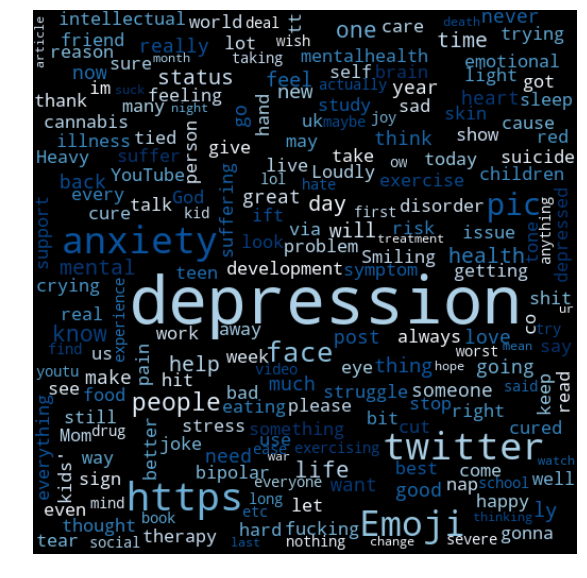

In [25]:
plt.figure( figsize=(15,10) )


plt.imshow(wc, interpolation='bilinear')

plt.axis("off")
plt.show()

### An example of TF-idf vectorizer

In [62]:
##importing TFidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [28]:
##Feeding a sentence
from sklearn.feature_extraction.text import CountVectorizer
sample_test_data = ['Country is looking to',"The truck is driven on the highway"]
vec = CountVectorizer()
vec.fit(sample_test_data)


                    

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [30]:
##vectore feature names
vec.get_feature_names()

['country', 'driven', 'highway', 'is', 'looking', 'on', 'the', 'to', 'truck']

In [31]:
##Creating a Vector
sample_test_dtm = vec.transform(sample_test_data)
sample_test_dtm

<2x9 sparse matrix of type '<class 'numpy.int64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [32]:
##Changing to array to see the result
sample_test_dtm.toarray()

array([[1, 0, 0, 1, 1, 0, 0, 1, 0],
       [0, 1, 1, 1, 0, 1, 2, 0, 1]], dtype=int64)

In [36]:
##Testing with a sample data
sample_tes_data = ['i love you country']

In [37]:
##Transforming
sample_tes_dtm = vec.transform(sample_tes_data)
sample_tes_dtm.toarray()

array([[1, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

## A graphical representation of the Tweets and Labels

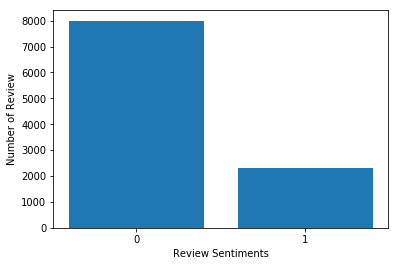

In [121]:
import matplotlib.ticker

Sentiment_count=tweets.groupby('label').count()
plt.bar(Sentiment_count.index.values, Sentiment_count['message'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')

locator = matplotlib.ticker.MultipleLocator(1)
plt.gca().xaxis.set_major_locator(locator)
formatter = matplotlib.ticker.StrMethodFormatter("{x:.0f}")
plt.gca().xaxis.set_major_formatter(formatter)
plt.show()


In [246]:
tweets

,message,label
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
5,so sleepy. good times tonight though,0
6,"@SilkCharm re: #nbn as someone already said, d...",0
7,23 or 24ï¿½C possible today. Nice,0
8,nite twitterville workout in the am -ciao,0
9,"@daNanner Night, darlin'! Sweet dreams to you",0


#                                 Normalization
Remove URLs.The URLs has to removed as it has nothing to do with emotions.

Remove Repeating characters:Remove the characters that repeats as it alter the meaning of the word for eg:it is too gooood.

Removing numbers and unwanted symbols:Remove unwanted symbols such as @,#and numbers it plays little to none role for our research.

Repeated words and username :Remove the words that is repearing as it make no sense and the username followed by @.

Removing ‘stop words’:The stop words such as ‘a’,’is’,’the’, for these words doesn’t make any contribution to the emotional analysis of the tweet.

In [ ]:

import pandas as pd
import numpy as np
cleaned=pd.DataFrame(tweets) 
cleaned['message']=cleaned['message'].to_string(na_rep='').lower()##if there is numbers !!!
xLower = cleaned['message'].str.lower()

In [ ]:
cleaned['message']

In [259]:
xSecureLower[2]

' '

In [18]:
import pandas as pd
import nltk
import time
df=pd.DataFrame(tweets)
start = time.time()
df1 = df["message"].apply(nltk.word_tokenize)



In [24]:
df['lowerd']=map(lambda x:x .lower(),df['message'])

In [44]:
df['message']=df['message'].str.lower()

In [47]:
df['message']

0        just had a real good moment. i missssssssss hi...
1               is reading manga  http://plurk.com/p/mzp1e
2        comeagainjen http://twitpic.com/2y2lx - http:/...
3        lapcat need to send 'em to my accountant tomor...
4            add me on myspace!!!  myspace.com/lookthunder
5                    so sleepy. good times tonight though 
6        silkcharm re: #nbn as someone already said, do...
7                       23 or 24ï¿½c possible today. nice 
8              nite twitterville  workout in the am  -ciao
9           dananner night, darlin'!  sweet dreams to you 
10                                good morning everybody! 
11       finally! i just created my wordpress blog. the...
12       kisha they cnt get over u til they get out frm...
13       nicolerichie yes i remember that band, it was ...
14                  i really love reflections and shadows 
15       blueaero ooo it's fantasy?  i like fantasy nov...
16       rokchic28 no probs, i sell nothing other than .

In [49]:
df['message']=df['message']=df.message.apply(lambda x:x.strip('@'))

In [50]:
df.head()

,Unnamed: 0,message,label,unigrams,battles,lowerd
0,106,just had a real good moment. i missssssssss hi...,0,"[just, had, a, real, good, moment, ., i, misss...",NaN,<map object at 0x0000012950795048>
1,217,is reading manga http://plurk.com/p/mzp1e,0,"[is, reading, manga, http, :, //plurk.com/p/mz...",NaN,<map object at 0x0000012950795048>
2,220,comeagainjen http://twitpic.com/2y2lx - http:/...,0,"[@, comeagainjen, http, :, //twitpic.com/2y2lx...",NaN,<map object at 0x0000012950795048>
3,288,lapcat need to send 'em to my accountant tomor...,0,"[@, lapcat, Need, to, send, 'em, to, my, accou...",NaN,<map object at 0x0000012950795048>
4,540,add me on myspace!!! myspace.com/lookthunder,0,"[ADD, ME, ON, MYSPACE, !, !, !, myspace.com/Lo...",NaN,<map object at 0x0000012950795048>


# Strippingoff symbols

In [51]:
df['message']=df.message.replace('#','&')
df['message']=df.message.apply(lambda x:x.strip('&'))

In [52]:
df['message']=df.message.replace('/\@\w\w+\s?/g','&')

In [66]:
df['message']=df['message']=df.message.apply(lambda x:x.strip(':'))
df['message']

0        just had a real good moment. i missssssssss hi...
1               is reading manga  http://plurk.com/p/mzp1e
2        comeagainjen http://twitpic.com/2y2lx - http:/...
3        lapcat need to send 'em to my accountant tomor...
4            add me on myspace!!!  myspace.com/lookthunder
5                    so sleepy. good times tonight though 
6        silkcharm re: #nbn as someone already said, do...
7                       23 or 24ï¿½c possible today. nice 
8              nite twitterville  workout in the am  -ciao
9           dananner night, darlin'!  sweet dreams to you 
10                                good morning everybody! 
11       finally! i just created my wordpress blog. the...
12       kisha they cnt get over u til they get out frm...
13       nicolerichie yes i remember that band, it was ...
14                  i really love reflections and shadows 
15       blueaero ooo it's fantasy?  i like fantasy nov...
16       rokchic28 no probs, i sell nothing other than .

In [5]:

pd.options.mode.chained_assignment = None 
#Preprocessing del RT @blablabla:
tweets['tweetos'] = '' 

#add tweetos first part
for i in range(len(tweets['message'])):
    try:
        tweets['tweetos'][i] = tweets['message'].str.split(' ')[i][0]
    except AttributeError:    
        tweets['tweetos'][i] = 'other'

#Preprocessing tweetos. select tweetos contains 'RT @'
for i in range(len(tweets['message'])):
    if tweets['tweetos'].str.contains('@')[i]  == False:
        tweets['tweetos'][i] = 'other'
        
# remove URLs, RTs, and twitter handles
for i in range(len(tweets['message'])):
    tweets['message'][i] = " ".join([word for word in tweets['message'][i].split()
                                if 'http' not in word and '@' not in word and '<' not in word])


tweets['message'][1]

'is reading manga'

In [5]:
tweets['tweetos']

0                  other
1                  other
2          @comeagainjen
3                @lapcat
4                  other
5                  other
6             @SilkCharm
7                  other
8                  other
9              @daNanner
10                 other
11                 other
12                 other
13         @nicolerichie
14                 other
15             @blueaero
16            @rokchic28
17           @shipovalov
18                 other
19             @Kal_Penn
20                 other
21                 other
22            @aidenchan
23       @sian_the_mouse
24                 other
25                 other
26                 other
27          @doubleickey
28                 other
29                 other
              ...       
10284              other
10285              other
10286              other
10287              other
10288              other
10289              other
10290              other
10291              other
10292    @MikeStuchbery_


In [6]:
tweets['message']

0        just had a real good moment. i missssssssss hi...
1                                         is reading manga
2                                                        -
3        Need to send 'em to my accountant tomorrow. Od...
4             ADD ME ON MYSPACE!!! myspace.com/LookThunder
5                     so sleepy. good times tonight though
6        re: #nbn as someone already said, does fiber t...
7                        23 or 24ï¿½C possible today. Nice
8                nite twitterville workout in the am -ciao
9                      Night, darlin'! Sweet dreams to you
10                                 Good morning everybody!
11       Finally! I just created my WordPress Blog. The...
12       kisha they cnt get over u til they get out frm...
13       Yes i remember that band, It was Awesome, Will...
14                   I really love reflections and shadows
15       ooo it's fantasy? i like fantasy novels will c...
16       no probs, I sell nothing other than my blog I'.

In [8]:
tweets['cleaned']=tweets['message']

In [9]:
pd.options.mode.chained_assignment = None 
#Preprocessing del RT @blablabla:
tweets['tweetos'] = '' 
#add tweetos first part
for i in range(len(tweets['message'])):
    try:
        tweets['tweetos'][i] = tweets['message'].str.split(' ')[i][0]
    except AttributeError:    
        tweets['tweetos'][i] = 'other'

#Preprocessing tweetos. select tweetos contains 'RT @'
for i in range(len(tweets['message'])):
    if tweets['tweetos'].str.contains('#')[i]  == False:
        tweets['tweetos'][i] = 'other'
        
# remove URLs, RTs, and twitter handles
for i in range(len(tweets['message'])):
    tweets['message'][i] = " ".join([word for word in tweets['message'][i].split()
                                if  '#' not in word ])


In [10]:
tweets['message']

0        just had a real good moment. i missssssssss hi...
1                                         is reading manga
2                                                        -
3        Need to send 'em to my accountant tomorrow. Od...
4             ADD ME ON MYSPACE!!! myspace.com/LookThunder
5                     so sleepy. good times tonight though
6        re: as someone already said, does fiber to the...
7                        23 or 24ï¿½C possible today. Nice
8                nite twitterville workout in the am -ciao
9                      Night, darlin'! Sweet dreams to you
10                                 Good morning everybody!
11       Finally! I just created my WordPress Blog. The...
12       kisha they cnt get over u til they get out frm...
13       Yes i remember that band, It was Awesome, Will...
14                   I really love reflections and shadows
15       ooo it's fantasy? i like fantasy novels will c...
16       no probs, I sell nothing other than my blog I'.

In [18]:
df1 = pd.DataFrame()
df1=tweets['message']
df1

0        just had a real good moment. i missssssssss hi...
1                                         is reading manga
2                                                        -
3        Need to send 'em to my accountant tomorrow. Od...
4             ADD ME ON MYSPACE!!! myspace.com/LookThunder
5                     so sleepy. good times tonight though
6        re: as someone already said, does fiber to the...
7                        23 or 24ï¿½C possible today. Nice
8                nite twitterville workout in the am -ciao
9                      Night, darlin'! Sweet dreams to you
10                                 Good morning everybody!
11       Finally! I just created my WordPress Blog. The...
12       kisha they cnt get over u til they get out frm...
13       Yes i remember that band, It was Awesome, Will...
14                   I really love reflections and shadows
15       ooo it's fantasy? i like fantasy novels will c...
16       no probs, I sell nothing other than my blog I'.

In [19]:
export_csv = df1.to_csv (r'C:\Users\cuneg\Desktop\export_dataframe.csv', index = None, header=True)

In [24]:
import re
tweets['message'] = tweets['message'].apply(lambda x: re.sub('[!@#$:).;,?&]', '', x.lower()))
tweets['message'] = tweets['message'].apply(lambda x: re.sub('  ', ' ', x))
tweets['message'][1]

'is reading manga'

In [22]:
tweets['message']

0        just had a real good moment i missssssssss him...
1                                         is reading manga
2                                                        -
3        need to send 'em to my accountant tomorrow odd...
4                 add me on myspace myspacecom/lookthunder
5                      so sleepy good times tonight though
6        re as someone already said does fiber to the h...
7                         23 or 24ï¿½c possible today nice
8                nite twitterville workout in the am -ciao
9                        night darlin' sweet dreams to you
10                                  good morning everybody
11       finally i just created my wordpress blog there...
12       kisha they cnt get over u til they get out frm...
13       yes i remember that band it was awesome will y...
14                   i really love reflections and shadows
15       ooo it's fantasy i like fantasy novels will ch...
16       no probs i sell nothing other than my blog i'l.

In [35]:
tweets['message'].replace(regex=True, inplace=True, to_replace=r'[^0-9a-zA-Z.]',
value=r'')


In [63]:
tweetsafter = pd.read_csv(r'C:\Users\cuneg\Desktop\export_dataframe.csv')
tweetsafter.head(20)

,message
0,just had a real good moment. i missssssssss hi...
1,is reading manga
2,-
3,Need to send 'em to my accountant tomorrow. Od...
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder
5,so sleepy. good times tonight though
6,"re: as someone already said, does fiber to the..."
7,23 or 24ï¿½C possible today. Nice
8,nite twitterville workout in the am -ciao
9,"Night, darlin'! Sweet dreams to you"


## Removing all the numbers and leave behind is the text.

In [65]:
##Retaining the Tweets in the alphabets a-z and capital letters A-Z
tweetsafter['message'].replace(regex=True, inplace=True, to_replace=r'[^a-zA-Z\s.]',
value=r'')


In [66]:
tweetsafter['message']

0        just had a real good moment. i missssssssss hi...
1                                         is reading manga
2                                                         
3        Need to send em to my accountant tomorrow. Odd...
4                 ADD ME ON MYSPACE myspace.comLookThunder
5                     so sleepy. good times tonight though
6        re as someone already said does fiber to the h...
7                                or C possible today. Nice
8                 nite twitterville workout in the am ciao
9                         Night darlin Sweet dreams to you
10                                  Good morning everybody
11       Finally I just created my WordPress Blog. Ther...
12       kisha they cnt get over u til they get out frm...
13       Yes i remember that band It was Awesome Will y...
14                   I really love reflections and shadows
15       ooo its fantasy i like fantasy novels will che...
16       no probs I sell nothing other than my blog Ill.

## Removing the trailing spaces

In [91]:
tweetsafter['message']=tweetsafter.message.replace('^\s+',' ',regex = True)

In [73]:
tweetsafter['message']=tweetsafter['message'].str.strip()

In [75]:
tweetsafter['message'][0]=tweetsafter['message'].map(lambda x: x.strip())

In [78]:
tweetsafter['message'][1]

'is reading manga'

In [104]:
df2=pd.DataFrame(tweetsafter['message'])

## The Cleaned data is stored in a csv file

In [82]:
export_csv = df2.to_csv (r'C:\Users\cuneg\Desktop\export_dataframe1.csv', index = None, header=True)

In [139]:
df3=pd.DataFrame(tweetsafter['message'])

In [128]:
df3

,message
0,just had a real good moment. i missssssssss hi...
1,is reading manga
2,
3,Need to send em to my accountant tomorrow. Odd...
4,ADD ME ON MYSPACE myspace.comLookThunder
5,so sleepy. good times tonight though
6,re as someone already said does fiber to the h...
7,or C possible today. Nice
8,nite twitterville workout in the am ciao
9,Night darlin Sweet dreams to you


In [132]:
type(df3)

pandas.core.frame.DataFrame

In [133]:
df3['message'].str.lower()

0        just had a real good moment. i missssssssss hi...
1                                         is reading manga
2                                                         
3        need to send em to my accountant tomorrow. odd...
4                 add me on myspace myspace.comlookthunder
5                     so sleepy. good times tonight though
6        re as someone already said does fiber to the h...
7                                or c possible today. nice
8                 nite twitterville workout in the am ciao
9                         night darlin sweet dreams to you
10                                  good morning everybody
11       finally i just created my wordpress blog. ther...
12       kisha they cnt get over u til they get out frm...
13       yes i remember that band it was awesome will y...
14                   i really love reflections and shadows
15       ooo its fantasy i like fantasy novels will che...
16       no probs i sell nothing other than my blog ill.

In [160]:
type(df3)

pandas.core.series.Series

### Deleting the empty records

In [144]:
df3=df3.drop([0,2])

In [147]:
df3

1                                         is reading manga
3        need to send em to my accountant tomorrow. odd...
4                 add me on myspace myspace.comlookthunder
5                     so sleepy. good times tonight though
6        re as someone already said does fiber to the h...
7                                or c possible today. nice
8                 nite twitterville workout in the am ciao
9                         night darlin sweet dreams to you
10                                  good morning everybody
11       finally i just created my wordpress blog. ther...
12       kisha they cnt get over u til they get out frm...
13       yes i remember that band it was awesome will y...
14                   i really love reflections and shadows
15       ooo its fantasy i like fantasy novels will che...
16       no probs i sell nothing other than my blog ill...
17                         quotnokla connecting peoplequot
18       once again stayed up to late and have to start.

In [148]:
export_csv = df3.to_csv (r'C:\Users\cuneg\Desktop\export_dataframe2.csv', index = None, header=True)

In [88]:
df3 = pd.read_csv(r'C:\Users\cuneg\Desktop\export_dataframe2.csv')
df3.head(20)

,message
0,is reading manga
1,need to send em to my accountant tomorrow. odd...
2,add me on myspace myspace.comlookthunder
3,so sleepy. good times tonight though
4,re as someone already said does fiber to the h...
5,or c possible today. nice
6,nite twitterville workout in the am ciao
7,night darlin sweet dreams to you
8,good morning everybody
9,finally i just created my wordpress blog. ther...


In [89]:
df3['message']

0                                         is reading manga
1        need to send em to my accountant tomorrow. odd...
2                 add me on myspace myspace.comlookthunder
3                     so sleepy. good times tonight though
4        re as someone already said does fiber to the h...
5                                or c possible today. nice
6                 nite twitterville workout in the am ciao
7                         night darlin sweet dreams to you
8                                   good morning everybody
9        finally i just created my wordpress blog. ther...
10       kisha they cnt get over u til they get out frm...
11       yes i remember that band it was awesome will y...
12                   i really love reflections and shadows
13       ooo its fantasy i like fantasy novels will che...
14       no probs i sell nothing other than my blog ill...
15                         quotnokla connecting peoplequot
16       once again stayed up to late and have to start.

# Vectorising and creating a unigram with NLTK toolkit a natural language processing toolkit from python.

In [90]:
import pandas as pd
import nltk
import time


start = time.time()
df3["unigrams"] = df3['message'].apply(nltk.word_tokenize)
print (time.time() - start)


3.75396466255188


In [91]:
df3["unigrams"]=df3["unigrams"].apply(lambda x: " ".join(x))

In [92]:
df3["unigrams"]

0                                         is reading manga
1        need to send em to my accountant tomorrow . od...
2                 add me on myspace myspace.comlookthunder
3                    so sleepy . good times tonight though
4        re as someone already said does fiber to the h...
5                               or c possible today . nice
6                 nite twitterville workout in the am ciao
7                         night darlin sweet dreams to you
8                                   good morning everybody
9        finally i just created my wordpress blog . the...
10       kisha they cnt get over u til they get out frm...
11       yes i remember that band it was awesome will y...
12                   i really love reflections and shadows
13       ooo its fantasy i like fantasy novels will che...
14       no probs i sell nothing other than my blog ill...
15                         quotnokla connecting peoplequot
16       once again stayed up to late and have to start.

# Polarity creating with labels 'positive','very positive','neutral','negative','very negative' using TextBlob 

In [96]:
from textblob import TextBlob

# compute sentiment scores (polarity) and labels
sentiment_scores_tb = [round(TextBlob(article).sentiment.polarity, 3) for article in df3['unigrams']]
sentiment_category_tb = ['positive' if score > 0 and score <0.6
                             else 'very positive' if score >=0.6
                              else 'negative' if score >-0.6 and score <=-0.1 
                               else 'very negative' if score >=-1 and score <=-0.6
                                 else 'neutral' 
                                     for score in sentiment_scores_tb]


# sentiment statistics per news category
df4 = pd.DataFrame([list(df3['unigrams']), sentiment_scores_tb, sentiment_category_tb]).T
df4.columns = ['Tweets', 'sentiment_score', 'sentiment_category']
df4['sentiment_score'] = df4.sentiment_score.astype('float')
df4['final_score'] = df4.sentiment_score
df4.groupby(by=['Tweets']).describe()

final_score              \
                                                         count   mean  std   
Tweets                                                                       
.                                                          1.0  0.000  NaN   
. . .                                                      1.0  0.000  NaN   
. ... but to confound gender dysphoria with the...         1.0 -0.150  NaN   
. i dont get a prayer . pass on the picnic got ...         1.0  0.000  NaN   
. i had mild depression in and no one even noti...         1.0  0.111  NaN   
. i had post partum depression for months . sev...         1.0  0.393  NaN   
. im gon na take my depression nap for three mo...         1.0 -0.197  NaN   
. is that enough almost there                              1.0  0.000  NaN   
. its depression porn .                                    1.0  0.000  NaN   
. kaskade am adam k amp soha remix . dakota joh...         1.0  0.000  NaN   
. quotmen follow men and nobody tweetsquot . .             1.0  0.000  NaN   
. the emotional ride of is rough . i woke up fi...         1.0 -0.134  NaN   
. with depression pic.twitter.comhxkhummc                  1.0  0.000  NaN   
.. follow like now                                         1.0  0.000  NaN   
.. get your groove on .                                    1.0  0.000  NaN   
.. that you are not afraid to use letter words             1.0  0.300  NaN   
.. with a bat up her nightdress                            1.0  0.000  NaN   
... .. warning lol i am just about to meditate ...         1.0  0.400  NaN   
... .but you already accepted the most importan...         1.0  0.450  NaN   
... .so always make the most of every situation...         1.0  0.500  NaN   
... and after a very long flight arrived in san...         1.0  0.318  NaN   
... and lastly vlogging in response to responses           1.0  0.000  NaN   
... and now we are in wyoming . by the way tc f...         1.0  0.000  NaN   
... and you even got your background fixed good...         1.0  0.400  NaN   
... but i can not get a reply . maybe do someth...         1.0  0.000  NaN   
... decided to create a new screen name ... its...         1.0 -0.010  NaN   
... for once in a while . still love my jeans a...         1.0  0.500  NaN   
... gerade twitter mit facebook verbunden                  1.0  0.000  NaN   
... got it ... you must be rechargeable                    1.0  0.000  NaN   
... hmm . and i dont know what its for seriously           1.0 -0.333  NaN   
...                                                        ...    ...  ...   
youre very welcome where are you trying to move to         1.0  1.000  NaN   
youre welcome                                              2.0  0.800  0.0   
youre welcome . go get em                                  1.0  0.800  NaN   
youre welcome . rosamunde pilchers book quotvej...         1.0  0.617  NaN   
youre welcome i like reading your tweets                   1.0  0.800  NaN   
youre welcomed                                             1.0  0.000  NaN   
youre wonderful amp i hope that feeling never e...         1.0  0.600  NaN   
youtube was a big help .                                   1.0  0.000  NaN   
youve been saving those up havent you                      1.0  0.000  NaN   
youve definitely stolen my heart atticren blue ...         1.0  0.175  NaN   
youve probably already decided what youre going...         1.0 -0.094  NaN   
yr old d has to speak to class on her favorite ...         1.0  0.300  NaN   
yuki o hai hai nihongo wa motto muzukashii gt.l...         1.0  0.000  NaN   
yum yum . i love quesadillas ... .and wallpaper...         1.0  0.500  NaN   
yummmmmm                                                   1.0  0.000  NaN   
yummy cant beat cooked flowers on your birthday...         1.0  0.800  NaN   
yummy how much in the mail discount ill review             1.0 -0.150  NaN   
yup                                                        1.0  0.000  Na

# The dataset with new labels sentiment category

In [97]:
df4

,Tweets,sentiment_score,sentiment_category,final_score
0,is reading manga,0.000,neutral,0.000
1,need to send em to my accountant tomorrow . od...,0.042,positive,0.042
2,add me on myspace myspace.comlookthunder,0.000,neutral,0.000
3,so sleepy . good times tonight though,0.700,very positive,0.700
4,re as someone already said does fiber to the h...,-0.204,negative,-0.204
5,or c possible today . nice,0.300,positive,0.300
6,nite twitterville workout in the am ciao,0.000,neutral,0.000
7,night darlin sweet dreams to you,0.350,positive,0.350
8,good morning everybody,0.700,very positive,0.700
9,finally i just created my wordpress blog . the...,0.000,neutral,0.000


In [239]:
def rounding(x):
    n=round(x,0)
    return n

In [240]:
df4["New"]=df4["sentiment_score"].apply(rounding)

In [4]:
df4

,Tweets,sentiment_score,sentiment_category,final_score
0,is reading manga,0.000,neutral,0.000
1,need to send em to my accountant tomorrow. odd...,0.042,positive,0.042
2,add me on myspace myspace.comlookthunder,0.000,neutral,0.000
3,so sleepy. good times tonight though,0.700,very positive,0.700
4,re as someone already said does fiber to the h...,-0.204,negative,-0.204
5,or c possible today. nice,0.300,positive,0.300
6,nite twitterville workout in the am ciao,0.000,neutral,0.000
7,night darlin sweet dreams to you,0.350,positive,0.350
8,good morning everybody,0.700,very positive,0.700
9,finally i just created my wordpress blog. ther...,0.000,neutral,0.000


# Visualising the dataset with new labels(sentiment_score)

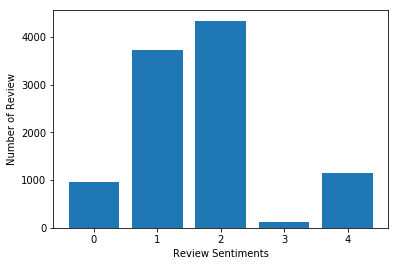

In [255]:
import matplotlib.ticker

Sentiment_count=df4.groupby('sentiment_category').count()
plt.bar(Sentiment_count.index.values, Sentiment_count['Tweets'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')

locator = matplotlib.ticker.MultipleLocator(1)
plt.gca().xaxis.set_major_locator(locator)
formatter = matplotlib.ticker.StrMethodFormatter("{x:.0f}")
plt.gca().xaxis.set_major_formatter(formatter)
plt.show()

# The dataset with new set of labels is moved to the csv file

In [98]:
export_csv = df4.to_csv (r'C:\Users\cuneg\Desktop\export_dataframe4.csv', index = None, header=True)

In [99]:
df4.shape[0]

10284

# The result is preprocessed ,which means data is  tokenized,Stemmed,Lemmatized

In [59]:
def process_message(message, lower_case = True, stem = True, stop_words = True, gram = 2):
    if lower_case:
        message = message.lower()
    words = message.split(" ")
    words = [w for w in words if len(w) > 2]
    if gram > 1:
        w = []
        for i in range(len(words) - gram + 1):
            w += [' '.join(words[i:i + gram])]
        return w
    if stop_words:
        sw = stopwords.words('english')
        words = [word for word in words if word not in sw]
    if stem:
        stemmer = PorterStemmer()
        words = [stemmer.stem(word) for word in words]   
    return words

In [205]:
df4.iloc[1,0]

'need to send em to my accountant tomorrow. oddly i wasnt even referring to my taxes. those are supporting evidence though.'

In [ ]:
cleanedlist=[]
import nltk
from nltk.tokenize import word_tokenize
i=0
for i in range (10284):
    message_processed = process_message(df3.iloc[i][0])
    
    cleanedlist.append(message_processed)
    cleaned = pd.DataFrame([list(cleanedlist)])

    #To keep track of whether the word has ocured in the message or not.
                           #For IDF
    i =i+1

In [ ]:
cleanedlist

In [220]:
for word in message_processed:
    print(word)

dont mistake
mistake bad
bad day
day with
with depression
depression everyone
everyone has


In [221]:
type(message_processed)

list

# An Example on how lemmatizing works 

In [3]:
##Lemmatizing identifies the word if it is in some other tense.
import nltk

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

print(lemmatizer.lemmatize("cacti"))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\cuneg\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
cactus


# The Tweet after preprocessing

In [54]:
df5['Tweets']

0                                        ['reading manga']
1        ['need send', 'send accountant', 'accountant t...
2        ['add myspace', 'myspace myspace.comlookthunder']
3        ['sleepy good', 'good times', 'times tonight',...
4        ['someone already', 'already said', 'said does...
5                         ['possible today', 'today nice']
6        ['nite twitterville', 'twitterville workout', ...
7        ['night darlin', 'darlin sweet', 'sweet dreams...
8                    ['good morning', 'morning everybody']
9        ['finally just', 'just created', 'created word...
10       ['kisha they', 'they cnt', 'cnt get', 'get ove...
11       ['yes remember', 'remember that', 'that band',...
12       ['really love', 'love reflections', 'reflectio...
13       ['ooo its', 'its fantasy', 'fantasy like', 'li...
14       ['probs sell', 'sell nothing', 'nothing other'...
15       ['quotnokla connecting', 'connecting peoplequot']
16       ['once again', 'again stayed', 'stayed late', .

# Vectorising with TfIdfVectorizer

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer()
x = v.fit_transform(df5['Tweets'])

df5['tweetsVect']=list(x)
df5['tweetsVect'] = list(x.toarray())

In [40]:
df5['tweetsVect']

0        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
5        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
6        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
7        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
8        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
9        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
10       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
11       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
12       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
13       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
14       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
15       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
16       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, .

In [100]:
import pandas as pd
df5 = pd.read_csv(r'C:\Users\cuneg\Desktop\export_dataframe4.csv')
df5.head(20)

,Tweets,sentiment_score,sentiment_category,final_score
0,is reading manga,0.000,neutral,0.000
1,need to send em to my accountant tomorrow . od...,0.042,positive,0.042
2,add me on myspace myspace.comlookthunder,0.000,neutral,0.000
3,so sleepy . good times tonight though,0.700,very positive,0.700
4,re as someone already said does fiber to the h...,-0.204,negative,-0.204
5,or c possible today . nice,0.300,positive,0.300
6,nite twitterville workout in the am ciao,0.000,neutral,0.000
7,night darlin sweet dreams to you,0.350,positive,0.350
8,good morning everybody,0.700,very positive,0.700
9,finally i just created my wordpress blog . the...,0.000,neutral,0.000


# Feature extraction BagOfWords calculation with CountVectorizer in python

In [102]:
type(df5['Tweets'])

pandas.core.series.Series

In [232]:
Vecto=CountVectorizer(ngram_range=(1,1))

Vecto

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [233]:
new_mat=Vecto.fit_transform(df5["Tweets"])

In [234]:
vect_words=pd.DataFrame(unigram_matrix[300:322].toarray(), columns=unigram.get_feature_names())


In [235]:
vect_words

,aaa,aaaaaaaaaaaaa,aaaaaaaand,aaaaaah,aaaaaand,aaaaayyyyy,aaaand,aaah,aaahhhh,aaahhhhhh,...,zoo,zoot,zooyork,zumba,zx,zzzs,zzzz,zzzzz,zzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Creating model 

In [161]:
y = df5.sentiment_category # define the target variable (dependent variable) as y
##logistic_unigram=logistic_unigram.fit(trainData,testData)

# Splitting into train set and test set with train_test_split

In [407]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(new_mat, y, test_size=0.3,random_state=1)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)


(7198, 15559) (7198,)
(3086, 15559) (3086,)


In [373]:
X_train

<7198x15559 sparse matrix of type '<class 'numpy.int64'>'
	with 89567 stored elements in Compressed Sparse Row format>

In [375]:
predictions

array([-0.57847555, -0.23679626, -0.47681425, ...,  0.53448021,
        0.11265987,  0.26732565])

In [238]:
new_mat

<10284x15559 sparse matrix of type '<class 'numpy.int64'>'
	with 128052 stored elements in Compressed Sparse Row format>

# Logistic Regression

In [376]:
from sklearn.linear_model import LogisticRegression
logre= LogisticRegression()
logre.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [377]:
X_train

<7198x15559 sparse matrix of type '<class 'numpy.int64'>'
	with 89567 stored elements in Compressed Sparse Row format>

# Accuracy Calculation

In [378]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.78


# Calculating Precision , Recall ,F1-Score 

In [379]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

     negative       0.64      0.32      0.43       278
      neutral       0.75      0.90      0.82      1110
     positive       0.85      0.82      0.83      1323
very negative       0.25      0.03      0.06        29
very positive       0.74      0.70      0.72       346

  avg / total       0.77      0.78      0.77      3086



# Confusion matrix for logistic regression

In [281]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[  89  140   46    2    1]
 [  23 1001   76    1    9]
 [  18  149 1081    0   75]
 [   8   20    0    1    0]
 [   0   31   74    0  241]]


In [381]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

     negative       0.64      0.32      0.43       278
      neutral       0.75      0.90      0.82      1110
     positive       0.85      0.82      0.83      1323
very negative       0.25      0.03      0.06        29
very positive       0.74      0.70      0.72       346

  avg / total       0.77      0.78      0.77      3086



# Preparing the data for Multinomial NB by calculating Tf-Idf

In [384]:
from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer()
x = v.fit_transform(df5['Tweets'])
x

<10284x15559 sparse matrix of type '<class 'numpy.float64'>'
	with 128052 stored elements in Compressed Sparse Row format>

# Calculating Precision , Recall ,F1-Score for multinomial NB

In [413]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
# cross validation score for Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
print(cross_val_score(nb, x,
        y, cv=10, scoring='accuracy').mean())
nb.fit(X_train, y_train)
y_pred_class = nb.predict(X_test)
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))
print (classification_report(y_test, y_pred_class))

0.5491166485426289
0.6043421905379132
               precision    recall  f1-score   support

     negative       0.46      0.09      0.15       278
      neutral       0.77      0.49      0.60      1110
     positive       0.56      0.95      0.70      1323
very negative       0.00      0.00      0.00        29
very positive       0.61      0.13      0.21       346

  avg / total       0.62      0.60      0.55      3086



# BernoulliNB

In [389]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
bnb = BernoulliNB(binarize=0.0)
bnb.fit(X_train, y_train)
bnb.score(X_test, y_test)

0.6474400518470512

# Support Vector Machine (SVM)

In [398]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf', random_state=0, gamma=.006518, C=100)
svclassifier.fit(X_train, y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.006518, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [399]:
y_pred = svclassifier.predict(X_test)

# Calculating Precision , Recall ,F1-Score for SVM after parameter tuning with Gridsearchcv the code above fed the SVM classifier  the values ( kernel ='rbf' ,gamma =.0065 and C=100)


In [401]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[ 145   92   31   10    0]
 [  53  991   57    2    7]
 [  46  110 1096    2   69]
 [  10   10    1    8    0]
 [   1   17   63    0  265]]
               precision    recall  f1-score   support

     negative       0.57      0.52      0.54       278
      neutral       0.81      0.89      0.85      1110
     positive       0.88      0.83      0.85      1323
very negative       0.36      0.28      0.31        29
very positive       0.78      0.77      0.77       346

  avg / total       0.81      0.81      0.81      3086



# Confusion matrix which shows the estimation of error , plotted for SVM is Given below

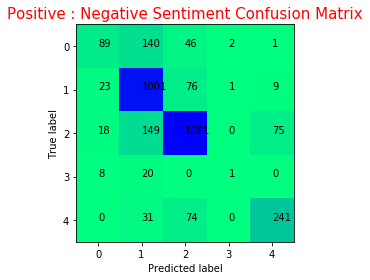

In [298]:
import matplotlib.pyplot as plt
import numpy as np

##plt.clf()
img = plt.imshow(confusion_matrix, interpolation='nearest')
img.set_cmap('winter_r')
class_names = ['Positive', 'Negative', 'Neutral','very positive','very negative']
plt.title('Positive : Negative Sentiment Confusion Matrix', fontsize="15", color="red")
plt.ylabel('True label')
plt.xlabel('Predicted label')

##tick_marks = np.arange(len(class_names))
##plt.xticks(tick_marks, class_names, rotation=45)
##plt.yticks(tick_marks, class_names)
##conf_labels = [['TP', 'FN'], ['FP', 'TN']]
for i in range(5):
    for j in range(5):
        plt.text(j, i, str(confusion_matrix[i][j]))
plt.show()


# Automatic parameter selection for SVM,parameter tuning with GridSearchcv a python function and fed the SVM with these parameters

In [342]:
import numpy as np
from sklearn.grid_search import GridSearchCV

param_grid = [
  {'C': [0.01, 0.1, 1, 10, 100], 'kernel': ['linear']},
  {'C': [0.01, 0.1, 1, 10, 100], 'gamma': np.logspace(-3, 2, 20), 'kernel': ['rbf']},
 ]

clf = GridSearchCV(svm.SVC(), param_grid,  cv=10,)
clf = clf.fit(new_mat, y)

# Best parameters for the model found using grid search
print('Best C:',clf.best_estimator_.C) 
print('Best Kernel:',clf.best_estimator_.kernel)
print('Best Gamma:',clf.best_estimator_.gamma)

Best C: 100
Best Kernel: rbf
Best Gamma: 0.006158482110660267


# Decision trees

In [414]:
from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


# Calculating Precision , Recall ,F1-Score for decision trees

In [415]:
# Model Accuracy, how often is the classifier correct?
from sklearn.metrics import accuracy_score
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print ("Accuracy is ", accuracy_score(y_test,y_pred)*100)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


Accuracy: 0.7394685677252106
Accuracy is  73.94685677252106
[[110  87  69   9   3]
 [ 42 951 100   8   9]
 [ 53 145 983   2 140]
 [  5   7   1  16   0]
 [  5  20  99   0 222]]
               precision    recall  f1-score   support

     negative       0.51      0.40      0.45       278
      neutral       0.79      0.86      0.82      1110
     positive       0.79      0.74      0.76      1323
very negative       0.46      0.55      0.50        29
very positive       0.59      0.64      0.62       346

  avg / total       0.74      0.74      0.74      3086



# Predicted result for the decision trees

In [353]:
y_pred[0:100]

array(['positive', 'negative', 'positive', 'neutral', 'very positive',
       'neutral', 'positive', 'neutral', 'positive', 'very positive',
       'positive', 'positive', 'neutral', 'positive', 'neutral',
       'positive', 'neutral', 'neutral', 'very positive', 'positive',
       'very positive', 'positive', 'positive', 'neutral', 'neutral',
       'very positive', 'neutral', 'positive', 'neutral', 'neutral',
       'positive', 'positive', 'neutral', 'neutral', 'positive',
       'positive', 'neutral', 'positive', 'positive', 'neutral',
       'neutral', 'positive', 'very positive', 'neutral', 'negative',
       'very negative', 'neutral', 'neutral', 'very positive', 'positive',
       'positive', 'neutral', 'positive', 'positive', 'positive',
       'positive', 'very positive', 'neutral', 'very positive',
       'positive', 'positive', 'neutral', 'negative', 'positive',
       'positive', 'positive', 'neutral', 'positive', 'neutral',
       'negative', 'positive', 'positive', 'very 

# Visualizing the result 

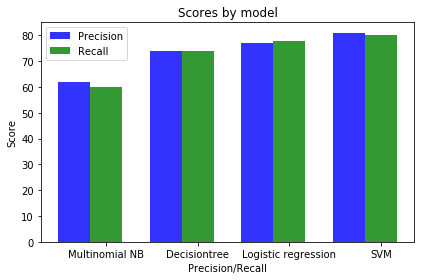

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# data to plot
n_groups = 4
means_frank = (62,74,77,81)
means_guido = (60,74,78,80)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_frank, bar_width,
alpha=opacity,
color='b',
label='Precision')

rects2 = plt.bar(index + bar_width, means_guido, bar_width,
alpha=opacity,
color='g',
label='Recall')

plt.xlabel('Precision/Recall')
plt.ylabel('Score')
plt.title('Scores by model')
plt.xticks(index + bar_width, ('Multinomial NB', 'Decisiontree', 'Logistic regression','SVM'))
plt.legend()

plt.tight_layout()
plt.show()